# Identifying traffic signs with AI.

<img alt="No U-turn Sign" src="https://www.toyotaofclermont.com/static/dealer-26422/Custom_Pages/Road_Signs/no-u-turn-sign.jpg" height=100>

This project explores the intersection of Deep Learning and Computer Vision by employing Neural Networks to identify which traffic sign appears in a photograph.

## Data
The images used in this project are from the German Traffic Sign Recognition Benchmark (GTSRB) dataset, which contains thousands of images of 43 different kinds of road signs.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import cv2 
import numpy as np
import os
import sys
import tensorflow as tf

from sklearn.model_selection import train_test_split

# Set constants
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.2
VALIDATION_SPLIT = 0.2

## Getting Familiar with the Data

In [2]:
os.listdir("gtsrb/0")[1]

'00002_00018.ppm'

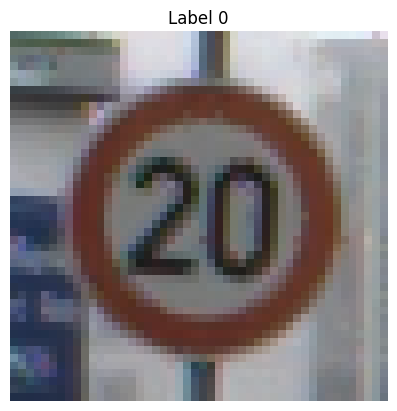

In [3]:
import cv2
import matplotlib.pyplot as plt

path = os.path.join('gtsrb', '0', '00002_00018.ppm')
sample_image = cv2.imread(path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  

plt.imshow(sample_image)
plt.title("Label 0")
plt.axis('off')
plt.show()

In [4]:
print(sample_image.shape)

(47, 48, 3)


In [5]:
r = cv2.resize(sample_image, (IMG_HEIGHT, IMG_WIDTH))
r.shape

(30, 30, 3)

## Processing the whole dataset

In [55]:
labels = [
    name for name in os.listdir("gtsrb/")
    if os.path.isdir(os.path.join("gtsrb/", name)) and name.isdigit()
]


X = []
y = []

for label in labels:
    path = os.path.join('gtsrb/', label)
    images = os.listdir(path)

    for image in images:
        absolute_path = os.path.join('gtsrb/', label, image)
        img = cv2.imread(absolute_path)
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        img = img.astype("float32") / 255.0 # Normalize the image
        X.append(img)
        y.append(int(label)) 
X = np.array(X)
y = np.array(y)

In [56]:
X.shape

(26640, 30, 30, 3)

In [57]:
y.shape

(26640,)

## Model 0: Multilayer Perceptron (MLP)

Simple Feed Forward Neural Network popularly known as a multilayer Perceptron(MLP)

In [58]:
from tensorflow.keras import layers, models, Input

model_0 = models.Sequential([
    Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.Flatten(),
    
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),

    layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [10]:
model_0.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [11]:
model_0.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In [13]:
history_0 = model_0.fit(X_train, y_train, epochs=EPOCHS, validation_split=VALIDATION_SPLIT)

Epoch 1/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2315 - loss: 3.0010 - val_accuracy: 0.5836 - val_loss: 1.5105
Epoch 2/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6445 - loss: 1.3040 - val_accuracy: 0.7258 - val_loss: 1.0627
Epoch 3/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7902 - loss: 0.7873 - val_accuracy: 0.7734 - val_loss: 0.7794
Epoch 4/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8303 - loss: 0.6210 - val_accuracy: 0.8424 - val_loss: 0.5614
Epoch 5/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8675 - loss: 0.4819 - val_accuracy: 0.8778 - val_loss: 0.4508
Epoch 6/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8738 - loss: 0.4492 - val_accuracy: 0.8825 - val_loss: 0.4126
Epoch 7/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9035 - loss: 0.3617 - val_accuracy: 0.8766 - val_loss: 0.4591
Epoch 8/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9016 - loss: 0.3465 - val_accuracy: 0.

In [14]:
model_0.save("traffic_model_0.keras")

In [15]:
import pandas as pd

def plot_training_metrics(history: dict):
    
    history_training = pd.DataFrame(history)
    history_validation = history_training[["val_accuracy", "val_loss"]]
    history_validation.index = history_training.index + 0.5
    
    plt.plot(history_validation.index, history_validation["val_accuracy"], linestyle="--", color="skyblue", label="Validation Accuracy")
    plt.plot(history_validation.index, history_validation["val_loss"], linestyle="--", color="tomato", label="Validation Loss")
    
    plt.plot(history_training.index, history_training["accuracy"], color="blue", label="Training Accuracy")
    plt.plot(history_training.index, history_training["loss"], color="red", label="Training Loss")
    
    plt.grid(True)
    plt.title(f"Training and Validation Accuracy and Loss accross {EPOCHS} training epochs.")
    plt.ylabel("Metrics")
    plt.xlabel("Epochs")
    plt.legend()
    plt.gca().set_ylim(0, 1) 
    plt.show()

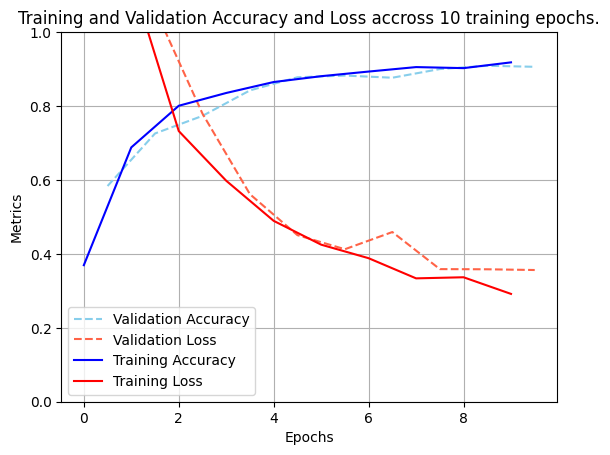

In [16]:
plot_training_metrics(history_0.history)

In [17]:
# Evaluate model on test set
model_0.evaluate(X_test, y_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9008 - loss: 0.3608


[0.37701237201690674, 0.8967717885971069]

In [18]:
def plot_predictions(model):
    X_new = X_test[:4]
    y_proba = model.predict(X_new)
    y_pred = np.argmax(y_proba, axis=1)
    fig, ax = plt.subplots(1, 4, figsize=(14, 16))
    for i in range(4):
        img = cv2.cvtColor(X_new[i], cv2.COLOR_BGR2RGB) 
        ax[i].imshow(img)
        ax[i].set_title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
        ax[i].set_axis_off()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


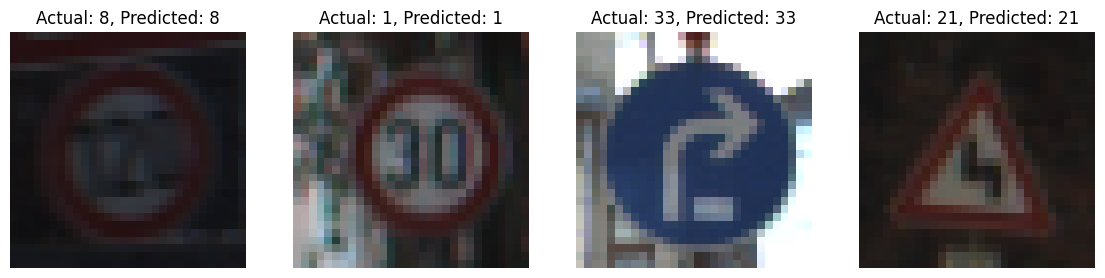

In [19]:
plot_predictions(model_0)

## Model 1: Convolutional Neural Network (CNN)

Here, we are going to add layers of convolution, max pooling, and use callbacks.

* **Convolution**
This involves applying a filter (kernel) that combines each pixel value with its neighbors, weighted according to the kernel matrix. A kernel is like a filter function that helps the model detect patterns such as edges or textures.

* **Max Pooling**
We add 2 layers of max pooling to reduce the spatial dimensions of the data. *Pooling* reduces the size of the input by sampling from regions in the input. *Max pooling* specifically selects the maximum value from each region.

* **Callbacks**

  * *Model Checkpoint*: Saves the model at certain points during training, useful in case of a crash.
  * *Early Stop*: Stops training early when the model performance stops improving, helping avoid overfitting. Here we train the model for 100 epochs as opposed to our constant 10 because the early stop callback will stop the training once the optimal solution is found.

In [20]:
model_1 = models.Sequential([
    Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation="relu"),
    layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [21]:
from tensorflow.keras import callbacks

checkpoint_cb = callbacks.ModelCheckpoint("traffic_model_1.keras", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=EPOCHS, restore_best_weights=True)

In [22]:
model_1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(X_train, y_train, epochs=100, validation_split=VALIDATION_SPLIT, callbacks=[checkpoint_cb, early_stopping_cb])

In [24]:
model_1.evaluate(X_test, y_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9903 - loss: 0.0494


[0.04437262564897537, 0.9909909963607788]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


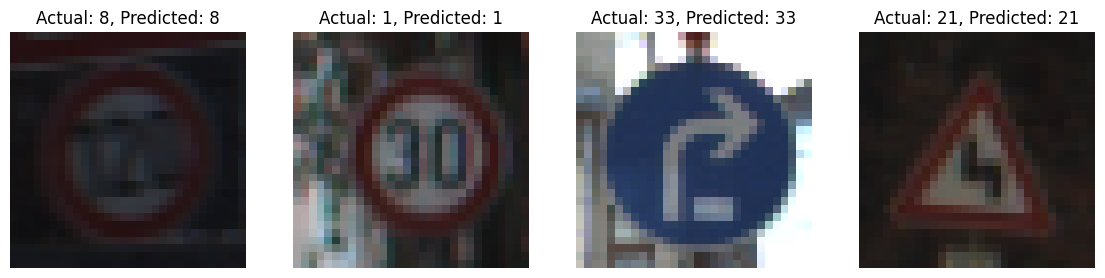

In [25]:
plot_predictions(model_1)

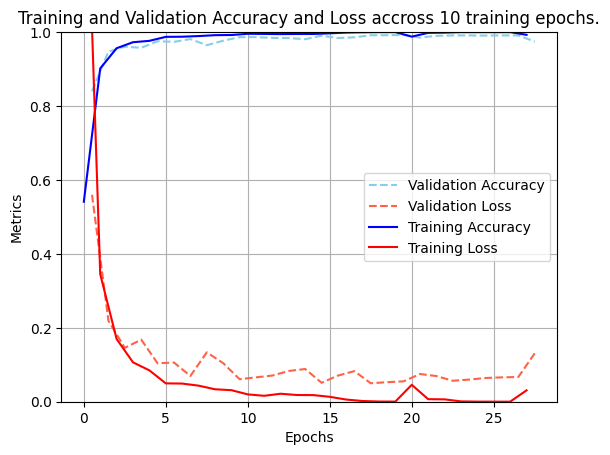

In [26]:
plot_training_metrics(history_1.history)

Adding convolution and max pooling led to very high accuracy. After just 7 training epochs, the model already surpassed 99% accuracy and was perfectly classifying the training data in under 20 epochs. We also confirmed that the model is not overfitting, as it achieved an impressive 99% accuracy on the test set.

In most cases, this level of performance would be more than satisfactory. However, since we have sufficient compute and are interested in further experimentation, we’ll explore a few more model architectures.

## Model 2: Convolutional Neural Network (CNN) with Dropout Regularization
The concept of *dropping out* with regards to CNNs, refers to temporarily removing randomly selected unitsfrom a neural network to prevent over-reliance on certain units.

In [27]:
model_2 = models.Sequential([
    Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),

    layers.Dropout(0.5),    
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation="relu"),
    layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [28]:
checkpoint_cb = callbacks.ModelCheckpoint("traffic_model_2.keras", save_best_only=True)

In [29]:
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(X_train, y_train, epochs=30, validation_split=VALIDATION_SPLIT, callbacks=[checkpoint_cb, early_stopping_cb])

In [38]:
model_2.evaluate(X_test, y_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9942 - loss: 0.0202


[0.018843792378902435, 0.9956831932067871]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


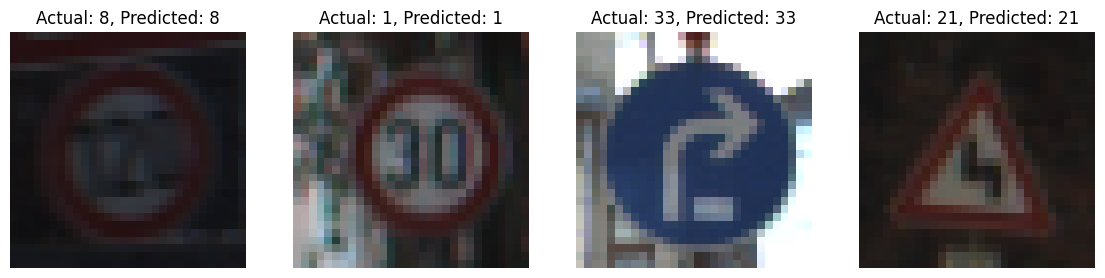

In [39]:
plot_predictions(model_2)

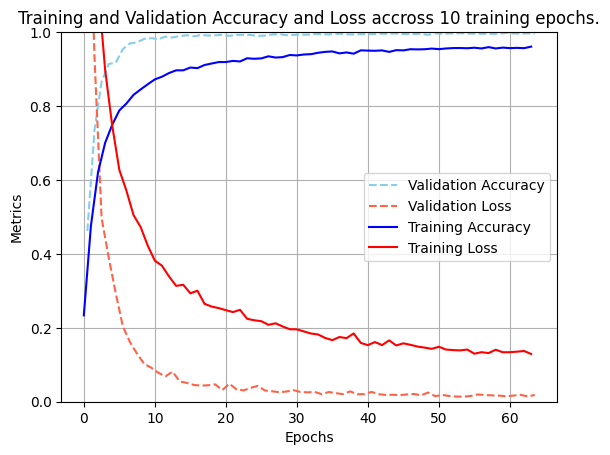

In [40]:
plot_training_metrics(history_2.history)

Incorporating dropout makes the model achieve high accuracy early on in training. However, the model spent longer in training just to achieve similar level of performance.



## Model 3: ResNetV2
Pretrained famous model ResNetV2.

In [62]:
X = X * 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import preprocess_input

def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])
    image = preprocess_input(image)
    return image, label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_set = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))


# Apply preprocessing
train_set = train_set.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
validation_set = validation_set.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_set = test_set.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [91]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet_v2 import preprocess_input

base_model = ResNet50V2(include_top=False, weights='imagenet', input_tensor=Input(shape=(224, 224, 3)), pooling="max")

x = base_model.output
output = layers.Dense(NUM_CATEGORIES, activation="softmax")(x)

In [92]:
checkpoint_cb = callbacks.ModelCheckpoint("traffic_model_3.keras", save_best_only=True)

In [93]:
# Freeze the weights and train
model_3 = models.Model(inputs=base_model.input, outputs=output)
for layer in base_model.layers:
    layer.trainable = False
    
optimizer = Adam(learning_rate=0.002)

model_3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])

In [ ]:
history_3 = model_3.fit(train_set, epochs=EPOCHS, validation_data=validation_set, callbacks=[checkpoint_cb, early_stopping_cb])

In [74]:
model_3_loaded = models.load_model("traffic_model_3.keras")

In [ ]:
model_3_loaded.evaluate(test_set)

In [105]:
from tensorflow.keras.applications import MobileNetV2

mobile_net = MobileNetV2(
    include_top=False,
    weights='imagenet',  
    input_shape=(96, 96, 3), 
    pooling='avg'
)
base_model.trainable = False 

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [110]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess(image, label):
    image = tf.image.resize(image, [96, 96]) 
    image = preprocess_input(image)
    return image, label

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=42)

train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_set = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))


# Apply preprocessing
train_set = train_set.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
validation_set = validation_set.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_set = test_set.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [117]:
for images, labels in test_set.take(1):
    print("Images shape:", images.shape)
    print("Images dtype:", images.dtype)
    print("Images min:", tf.reduce_min(images).numpy())
    print("Images max:", tf.reduce_max(images).numpy())
    print("Labels dtype:", labels.dtype)
    print("Labels:", labels.numpy())

Images shape: (32, 96, 96, 3)
Images dtype: <dtype: 'float32'>
Images min: -0.98039216
Images max: 1.0
Labels dtype: <dtype: 'int64'>
Labels: [ 8  1 33 21 12 37 26 13 33 38  7 11  9  2 13 35  9 41 16  4 26 13 13 17
 33  5 11 25 31  7 38 12]


In [119]:
x = mobile_net.output
output = layers.Dense(NUM_CATEGORIES, activation='softmax')(x)
model_4 = models.Model(inputs=mobile_net.input, outputs=output)
model_4.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
checkpoint_cb = callbacks.ModelCheckpoint("traffic_model_4.keras", save_best_only=True)

In [123]:
history_4 = model_4.fit(train_set, validation_data=validation_set, epochs=EPOCHS//2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/5
533/533 ━━━━━━━━━━━━━━━━━━━━ 437s 820ms/step - accuracy: 0.8239 - loss: 0.6137 - val_accuracy: 0.3195 - val_loss: 8.0265
Epoch 2/5
533/533 ━━━━━━━━━━━━━━━━━━━━ 415s 777ms/step - accuracy: 0.9692 - loss: 0.1079 - val_accuracy: 0.3756 - val_loss: 8.4420
Epoch 3/5
533/533 ━━━━━━━━━━━━━━━━━━━━ 418s 785ms/step - accuracy: 0.9727 - loss: 0.1025 - val_accuracy: 0.5672 - val_loss: 4.0365
Epoch 4/5
533/533 ━━━━━━━━━━━━━━━━━━━━ 420s 788ms/step - accuracy: 0.9840 - loss: 0.0581 - val_accuracy: 0.5065 - val_loss: 5.1354
Epoch 5/5
533/533 ━━━━━━━━━━━━━━━━━━━━ 391s 733ms/step - accuracy: 0.9874 - loss: 0.0467 - val_accuracy: 0.7023 - val_loss: 2.6663


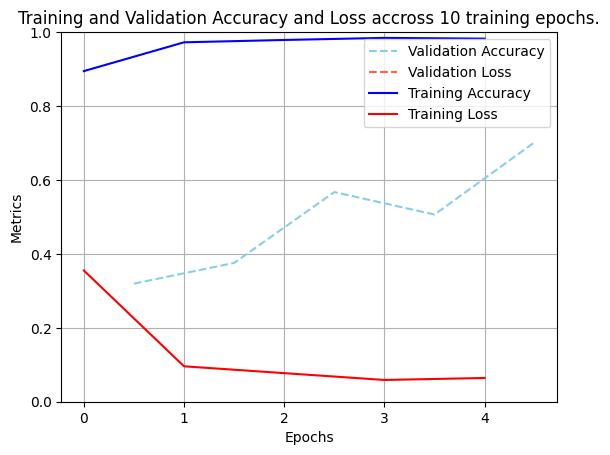

In [127]:
plot_training_metrics(history_4.history)